In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import pandas as pd

In [2]:
csv_file = "VASASHData.csv"

In [3]:
data = pd.read_csv(csv_file,encoding='latin1')

In [4]:
data.columns

Index(['EIAannoID', 'ID', 'Match', 'Round', 'half', 'time',
       'Team in possession', 'possessionlabel', 'player', 'postion',
       'positiondetail', 'team', 'Action', 'Atr', 'LocX', 'LocY', 'Result',
       'Direction/type', 'distance', 'angle', 'DS', 'Season'],
      dtype='object')

In [5]:
#data[data['team'] == 'Vancouver Whitecaps FC']

In [6]:
actions = dict()
for act in data['Action']:
    if act in actions:
        actions[act] += 1
    else:
        actions[act] = 1
actions

{'attacking action': 43525,
 'corner': 3672,
 'defending action': 79107,
 'direct free kick': 406,
 'dribble': 13724,
 'foul': 9041,
 'goal attempt': 8459,
 'goal kick': 6519,
 'indirect free kick': 9833,
 'interception': 5509,
 'offside': 1367,
 'pass': 295057,
 'penalty': 118,
 'reception': 24581,
 'save on goal attempt': 3364,
 'throw in': 16380,
 'touch': 538}

In [7]:
frame = pd.DataFrame(data)
frame[data['team']=='Vancouver Whitecaps FC'].sort_values(by='possessionlabel')

,EIAannoID,ID,Match,Round,half,time,Team in possession,possessionlabel,player,postion,...,Action,Atr,LocX,LocY,Result,Direction/type,distance,angle,DS,Season
340258,44329128,14376,35897,1,1,209.23,Vancouver Whitecaps FC,35897m10,Matías Alejandro Laba,MID,...,pass,r,65.541603,47.607052,Jordan Harvey,wide,17.467206,267.939776,0,2017.0
340260,44329150,14380,35897,1,1,220.43,Vancouver Whitecaps FC,35897m10,Alphonso Davies,MID,...,pass,lv,94.191521,21.662470,NotCompleted,backwardshort,13.109127,102.799684,0,2017.0
340259,44329142,14378,35897,1,1,217.36,Vancouver Whitecaps FC,35897m10,Alphonso Davies,MID,...,attacking action,yz,83.516479,4.911842,win,Groundleft,0.000000,0.000000,0,2017.0
38467,44329133,14377,35897,1,1,213.63,Vancouver Whitecaps FC,35897m10,Jordan Harvey,DEF,...,pass,l,64.913658,22.670031,Alphonso Davies,forwardshort,22.373825,326.248458,0,2017.0
302703,44335746,15114,35897,1,2,249.45,Vancouver Whitecaps FC,35897m101,David Ousted,GK,...,save on goal attempt,chgd,4.709576,48.290001,NaN,NaN,0.000000,0.000000,0,2017.0
228130,44335814,15118,35897,1,2,274.90,Vancouver Whitecaps FC,35897m101,Kekuta Manneh,FW,...,pass,l,62.323391,51.007561,Matías Alejandro Laba,backwardshort,16.532084,221.804581,0,2017.0
340548,44335795,15116,35897,1,2,265.84,Vancouver Whitecaps FC,35897m101,Matías Alejandro Laba,MID,...,pass,dl,41.915230,40.554161,Andrew Jacobson,backwardshort,15.797218,118.814285,0,2017.0
302704,44335784,15115,35897,1,2,264.58,Vancouver Whitecaps FC,35897m101,David Ousted,GK,...,pass,r,9.497645,57.808559,Matías Alejandro Laba,forwardlong,34.594505,339.565713,0,2017.0
340550,44335817,15119,35897,1,2,276.10,Vancouver Whitecaps FC,35897m101,Matías Alejandro Laba,MID,...,attacking action,z,50.000000,35.264481,lose,Ground,0.000000,0.000000,0,2017.0
340549,44335808,15117,35897,1,2,273.56,Vancouver Whitecaps FC,35897m101,Andrew Jacobson,MID,...,pass,r,34.301411,60.327461,Kekuta Manneh,forwardshort,28.771393,346.894159,0,2017.0


In [8]:
def allTargets(player_name,action):
    player_frame = frame[data['player']==player_name]
    pass_targets = dict()
    pass_count = 0
    for target in player_frame[player_frame['Action']==action]['Result']:
        if target in pass_targets:
            pass_targets[target] += 1
            pass_count += 1
        else:
            pass_targets[target] = 1
            pass_count += 1
    return pass_targets, pass_count


In [9]:
targets,tot_cnt = allTargets("Fredy Montero",'pass')
targets

{'Ali Ghazal': 6,
 'Alphonso Davies': 24,
 'Andrew Jacobson': 15,
 'Bernie Ibini-Isei': 13,
 'Brek Shea': 27,
 'Christian Bolaños': 37,
 'Cristian Rafael Techera Cribelli': 70,
 'Erik Hurtado': 5,
 'Jakob Nerwinski': 31,
 'Jordan Harvey': 26,
 'Kendall Waston': 14,
 'Marcel de Jong': 8,
 'Matías Alejandro Laba': 20,
 'Mauro Damían Rosales': 2,
 'Nicolás Mezquida': 26,
 'NotCompleted': 158,
 'Russel Teibert': 6,
 'Sheanon Williams': 15,
 'Tim Parker': 7,
 'Tony Tchani': 28,
 'Yordy Reyna': 36}

In [10]:
def actionFreq(player,action):
    action_dict,tot_cnt = allTargets(player,action)
    freq_dict = dict()
    for player in action_dict:
        freq_dict[player] = round(float(action_dict[player])/tot_cnt,5)
    return freq_dict

In [11]:
a_f = actionFreq('Fredy Montero','pass')
a_f

{'Ali Ghazal': 0.01045,
 'Alphonso Davies': 0.04181,
 'Andrew Jacobson': 0.02613,
 'Bernie Ibini-Isei': 0.02265,
 'Brek Shea': 0.04704,
 'Christian Bolaños': 0.06446,
 'Cristian Rafael Techera Cribelli': 0.12195,
 'Erik Hurtado': 0.00871,
 'Jakob Nerwinski': 0.05401,
 'Jordan Harvey': 0.0453,
 'Kendall Waston': 0.02439,
 'Marcel de Jong': 0.01394,
 'Matías Alejandro Laba': 0.03484,
 'Mauro Damían Rosales': 0.00348,
 'Nicolás Mezquida': 0.0453,
 'NotCompleted': 0.27526,
 'Russel Teibert': 0.01045,
 'Sheanon Williams': 0.02613,
 'Tim Parker': 0.0122,
 'Tony Tchani': 0.04878,
 'Yordy Reyna': 0.06272}

In [12]:
def dict2List(dict_):
    L = []
    for key in dict_:
        if not(key == 'NotCompleted'):
            L.append([dict_[key],key])
    L.sort()
    L_key = []
    L_ele = []
    for pair in L:
        L_key.append(pair[1])
        L_ele.append(pair[0])
    return L_key,L_ele

In [13]:
act_list,tar_list = dict2List(a_f)
print(act_list)
print(tar_list)

['Mauro Damían Rosales', 'Erik Hurtado', 'Ali Ghazal', 'Russel Teibert', 'Tim Parker', 'Marcel de Jong', 'Bernie Ibini-Isei', 'Kendall Waston', 'Andrew Jacobson', 'Sheanon Williams', 'Matías Alejandro Laba', 'Alphonso Davies', 'Jordan Harvey', 'Nicolás Mezquida', 'Brek Shea', 'Tony Tchani', 'Jakob Nerwinski', 'Yordy Reyna', 'Christian Bolaños', 'Cristian Rafael Techera Cribelli']
[0.00348, 0.00871, 0.01045, 0.01045, 0.0122, 0.01394, 0.02265, 0.02439, 0.02613, 0.02613, 0.03484, 0.04181, 0.0453, 0.0453, 0.04704, 0.04878, 0.05401, 0.06272, 0.06446, 0.12195]


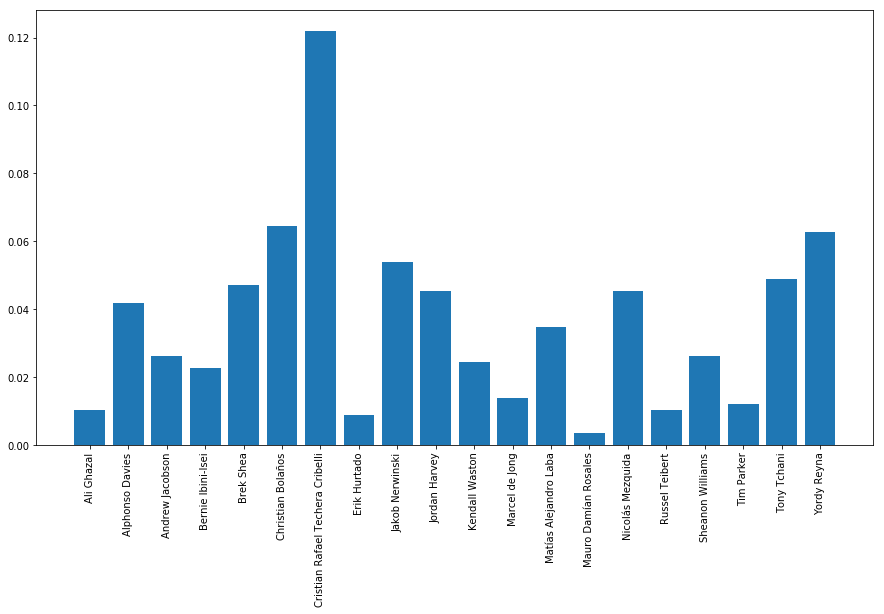

In [14]:
plt.figure(figsize=(15,8))
plt.xticks(rotation='vertical')
plt.bar(act_list,tar_list)
plt.show()

In [15]:
def playerChemistry(player_A, player_B, dict_A, dict_B):
    chem = 0
    if player_A in dict_B:
        chem = chem + dict_B[player_A]
    if player_B in dict_A:
        chem = chem + dict_A[player_B]
    return (chem/2)

In [16]:
def getPlayers(team):
    players = dict()
    for p in frame[data['team']==team].player:
        if p in players:
            players[p] += 1
        else:
            players[p] = 1
    return players

In [17]:
def maxTeamChemistry(team):
    players = getPlayers(team)
    max_chem = 0
    max_A = []
    max_B = []
    for player_A in players:
        dict_A = actionFreq(player_A,'pass')
        for player_B in players:
            if not(player_A == player_B):
                dict_B = actionFreq(player_B,'pass')
                chem = playerChemistry(player_A,player_B,dict_A,dict_B)
                if chem > max_chem:
                    max_chem = chem
                    max_A = [player_A]
                    max_B = [player_B]
                elif chem == max_chem:
                    if not(player_A in max_B) or not(player_B in max_A):
                        max_A.append(player_A)
                        max_B.append(player_B)
    return(max_chem,max_A,max_B)

In [ ]:
def teamChemistry(team,cut_off):
    players = getPlayers(team)
    chem_dict = dict()
    for player_A in players:
        if players[player_A] > cut_off:
            dict_A = actionFreq(player_A,'pass')
            for player_B in players:
                if not(player_A == player_B):
                    if players[player_B] > cut_off:
                        dict_B = actionFreq(player_B,'pass')
                        chem = playerChemistry(player_A,player_B,dict_A,dict_B)
                        if not((player_A,player_B) in chem_dict) and not((player_B,player_A) in chem_dict):
                            chem_dict[(player_A,player_B)] = [chem]
                        elif ((player_A,player_B) in chem_dict) and not((player_B,player_A) in chem_dict):
                            chem_dict[(player_A,player_B)].append(chem)
    return chem_dict

In [ ]:
team_chem = teamChemistry('Vancouver Whitecaps FC',100)

In [ ]:
team_chem

In [ ]:
players = getPlayers('Vancouver Whitecaps FC')
n = 0
counter = 0
starters = dict()
for player in players:
    if players[player] > 300:
        starters[player] = counter
        counter += 1
        n += 1
        
Matrix = [[0 for x in range(n)] for y in range(n)] 

In [ ]:
match = 36169

def average_position(match, player):
    player_locX = data[data['Match']==match].groupby(['player'])['LocX'].apply(list)[0]
    player_locY = data[data['Match']==match].groupby(['player'])['LocY'].apply(list)[1]
    return np.average(player_locX[player]),np.average(player_locY[player])

In [ ]:
possessions = data[data['team']=='Vancouver Whitecaps FC'].groupby(['possessionlabel'])['player'].apply(list)

In [ ]:
possessions

In [ ]:
team = 'Vancouver Whitecaps FC'

img = plt.imread("soccer_pitch.jpg")
fig, ax = plt.subplots(figsize=(100,100))
ax.imshow(img)
plt.axis('off')

dict_ = dict()

for player in starters:
    x = data[data['team']==team][data['player']==player][data['Match']==match].mean()['LocX']
    y = data[data['team']==team][data['player']==player][data['Match']==match].mean()['LocY']
    dict_[player] = (x,y)
    if x != 'nan':
        circle = plt.Circle((x, y), 5, color='w')
        fig = plt.gcf()
        ax = fig.gca()
        ax.add_artist(circle)

In [ ]:
for pair in team_chem:
    if (pair[0] in starters) and (pair[1] in starters):
        x1 = dict_[pair[0]][0]
        y1 = dict_[pair[0]][1]
        x2 = dict_[pair[1]][0]
        y2 = dict_[pair[1]][1]
        ax.plot((x1,x2),(y1,y2))

In [ ]:
plt.show()